# Module 4 Data Visualization Using Python

This notebook will go through the following topics in order:
* Data Visualization Python Package introduction
    * Matplotlib
    * Seaborn

* Data Reading
* Univariate Charts (using Matplotlib & Seaborn)
    * Bar charts
    * Grouped Bar Charts
    * Stacked Bar Charts
    * Pie charts
    * Histograms
* Bivariate charts
    * Scatter plots
    * Bubble Charts
    * Box plots
    * Heat Maps
* Time series chart
* Customizing plots
---


____

## Importing Packages

In [ ]:
import matplotlib.pyplot as plt 
import seaborn as sns
import pandas as pd
import numpy as np

## Data Reading

In [ ]:
data = pd.read_csv('https://covid.ourworldindata.org/data/owid-covid-data.csv')

In [ ]:
## check data sample
data.head()

## **Univariate Charts**

### **a. Bar Charts**
Bar charts are used when we want to compare the values of a metric across different groups in the data

---
**Problem Statement:** 

We want to know which continents were affected more by COVID-19 . For this we look at the total cases in each country.



* Bar plots using Matplotlib

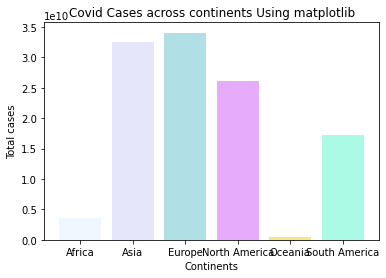

In [ ]:
#Creating the dataset
df=data.groupby('continent')['total_cases'].sum().to_frame().reset_index()
#Creating the column plot 
plt.bar(df['continent'],df['total_cases'],
        color = ['#F0F8FF','#E6E6FA','#B0E0E6','#E6ABFA','#FAE680','#ABFAE6']) # you can specify you colur choices using hex codes
#Adding the aesthetics
plt.title('Covid Cases across continents Using matplotlib')
plt.xlabel('Continents')
plt.ylabel('Total cases') 
#Show the plot
plt.show()

* Bar plots using Seaborn

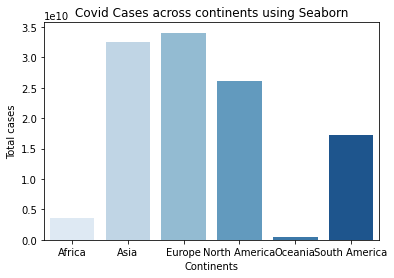

In [ ]:
#Creating bar plot
sns.barplot(x = 'continent',y = 'total_cases',data = df,palette = "Blues")
#Adding the aesthetics
plt.title('Covid Cases across continents using Seaborn')
plt.xlabel('Continents')
plt.ylabel('Total cases') 
# Show the plot
plt.show()

### **b. Grouped Bar Charts**
We use grouped bar charts when we want to compare metrics across groups & sub groups within the data

---

**Problem Statement:** 

We want to know how COVID effects change in different population density regions across continents.



* Grouped Bar plots using Matplotlib

In [ ]:
#Creating the new column for groups
df = data.copy()
df['population_density_cat'] = ['Low_Density' if x <= 100 else ('Moderate_Density' if (x > 100) & (x <= 500)
                            else (
                                'High_Density'
                            ) ) for x in df['population_density']]


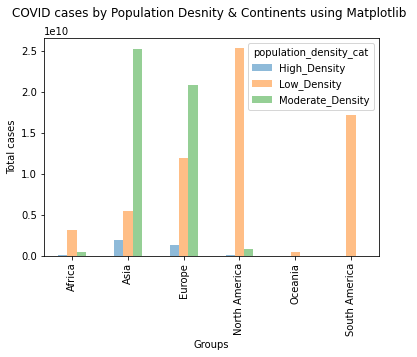

In [ ]:
#Creating the dataset
df_pivot = pd.pivot_table(df, values="total_cases",index="continent",columns="population_density_cat", aggfunc=np.sum)
#Creating a grouped bar chart
ax = df_pivot.plot(kind="bar",alpha=0.5) ## alpha is for the changing the opacity/transparency of the bars , default is 1
#Adding the aesthetics
plt.title('COVID cases by Population Desnity & Continents using Matplotlib \n')
plt.xlabel('Groups')
plt.ylabel('Total cases') 
# Show the plot
plt.show()

* Grouped Bar plots using Seaborn

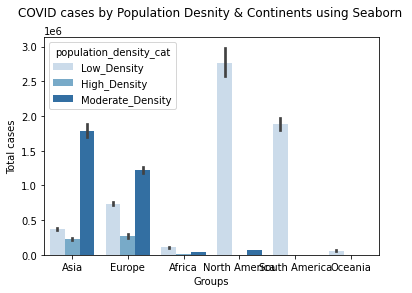

In [ ]:
#Creating the bar plot grouped across classes
sns.barplot(x = 'continent',y = 'total_cases',
            hue = 'population_density_cat',data = df, palette = "Blues") ## hue takes the column name for subgroups in seaborn
#Adding the aesthetics
plt.title('COVID cases by Population Desnity & Continents using Seaborn \n')
plt.xlabel('Groups')
plt.ylabel('Total cases') 
# Show the plot
plt.show()

### **c. Stacked Bar Charts**
We use stacked bar charts when we want to compare the total size of groups & the composition of sub groups

---

**Problem Statement:** 

We want to know how COVID effects different Men, Women & children across all continents



In [ ]:
## Create dataset
gender_list = ['Male','Female','Child']
df['gender'] = np.random.choice(gender_list, size=len(df))

* Stacked Bar plots using Matplotlib

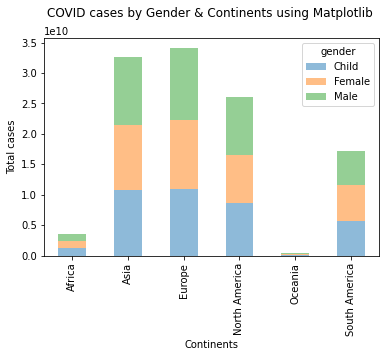

In [ ]:
#Creating the dataset
df_pivot = pd.pivot_table(df, values="total_cases",index="continent",columns="gender", aggfunc= np.sum)
#Creating a stacked bar chart
ax = df_pivot.plot(kind="bar",alpha=0.5, stacked = True) ## alpha is for the changing the opacity/transparency of the bars , default is 1
#Adding the aesthetics
plt.title('COVID cases by Gender & Continents using Matplotlib \n')
plt.xlabel('Continents')
plt.ylabel('Total cases') 
# Show the plot
plt.show()

* Stacked Bar plots using Seaborn

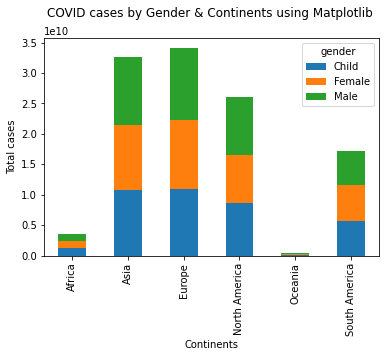

In [ ]:
df_pivot.plot(kind='bar', stacked=True)
#Adding the aesthetics
plt.title('COVID cases by Gender & Continents using Matplotlib \n')
plt.xlabel('Continents')
plt.ylabel('Total cases') 
# Show the plot
plt.show()

### **d. Pie Charts**
We use pie charts when we want to identify proportions components out of the total

Note: All components in the pie chart must be **mutually exclusive** and **collectively exhaustive**

---

**Problem Statement:** 

We want to know which continents were most & least affected due to COVID-19



In [ ]:
#Creating the dataset
df=data.groupby('continent')['total_cases'].sum().to_frame()
# Create the pie chart
df.plot.pie( y = 'total_cases' , legend = False)
#Adding the aesthetics
plt.title('Pie Chart for porportion of cases in each continent')
#Show the plot
plt.show()


### The above chart is not very intuitive to compare continents like Europe , Asia & North America as they look almost similar to the human eye
### Let's add a proportion to each pie


In [ ]:
# Create the pie chart
df.plot.pie( y = 'total_cases' , legend = False , autopct = '%.1f%%')
#Adding the aesthetics
plt.title('Pie Chart for porportion of cases in each continent')
#Show the plot
plt.show()

### **e. Histograms**

We use histograms when we want to observe the distribution of a single variable

---

**Problem Statement:** 

Find out the distribution of new deaths each day in Indonesia



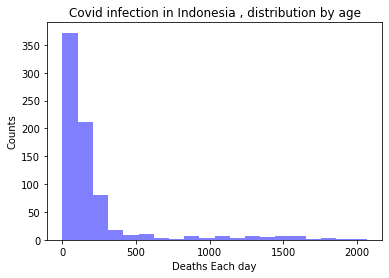

In [ ]:
#Creating the column histogram
plt.hist(data[data['location'] == 'Indonesia']['new_deaths'], color='blue',alpha=0.5, bins=20)
#Adding the aesthetics
plt.title('Covid infection in Indonesia , distribution by age')
plt.xlabel('Deaths Each day')
plt.ylabel('Counts') 
#Show the plot
plt.show()

In [ ]:
sns.histplot(data, x='location')

## **Bivariate Charts**

### **a. Scatter Plots**
Scatter plots can be leveraged to identify relationships between two variables. It can be effectively used in circumstances where the dependent variable can have multiple values for the independent variable.

---
**Problem Statement:** 

The COVID-19 health care team wants you to find out if there vaccinations are able to stop critical COVID cases

For this , we want to look at the relationship between People that are vaccinated and the weekly hospital admissions


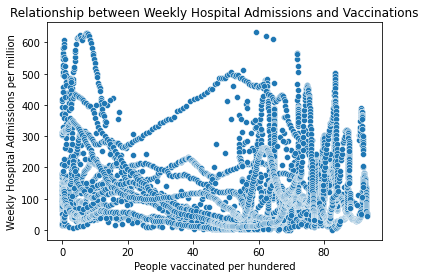

In [ ]:
#Creating scatter plot
sns.scatterplot(data=data, x="people_vaccinated_per_hundred", y="weekly_hosp_admissions_per_million")
#Adding the aesthetics
plt.title('Relationship between Weekly Hospital Admissions and Vaccinations')
plt.xlabel('People vaccinated per hundered')
plt.ylabel('Weekly Hospital Admissions per million') 
# Show the plot
plt.show()


### **b. Bubble Charts**
Bubble charts are advanced scatter plots that can help us visualize relationships across three different variables

---
**Problem Statement:** 

Like before , the COVID-19 health care team wants you to find out if there vaccinations are able to stop critical COVID cases and also look at countries with heavy comorbidities (eg : population with more diabetic patients) in the continent of Europe

For this , we want to look at the relationship between People that are vaccinated and the weekly hospital admissions along with the diabetes prevalance of that region


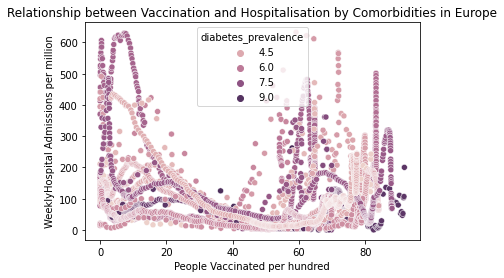

In [ ]:
#Creating bubble plot
sns.scatterplot(data=data[data['continent'] == 'Europe'], x="people_vaccinated_per_hundred", y="weekly_hosp_admissions_per_million", hue ="diabetes_prevalence")
#Adding the aesthetics
plt.title('Relationship between Vaccination and Hospitalisation by Comorbidities in Europe')
plt.xlabel('People Vaccinated per hundred')
plt.ylabel('WeeklyHospital Admissions per million') 
# Show the plot
plt.show() ## so we see more people getting vaccinated reduces critical COVID cases even for countries with high number of diabetic patients

### **c. Box plots**
Box plots gives the central value , its variability and outliers. It can be viewed across groups.

---
**Problem Statement:** 

We want to know how countries in Asia are doing in testing people for COVID-19 virus. More tests will lead to quicker discovery of the virus and lesser spread.

We want to look for only selected countries : India, Indonesia, Singapore, Thailand, Vietnam 


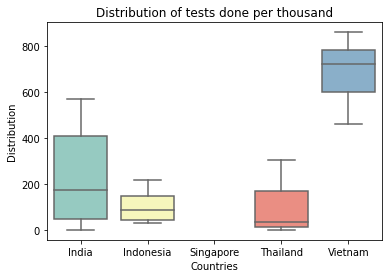

In [ ]:
countries_list = ['Indonesia', 'India', 'Singapore','Thailand', 'Vietnam']
#Creating boxplots
ax = sns.boxplot(x="location", y="total_tests_per_thousand", data=data[data['location'].isin(countries_list)], palette="Set3")
#Adding the aesthetics
plt.title('Distribution of tests done per thousand')
plt.xlabel('Countries')
plt.ylabel('Distribution') 
# Show the plot
plt.show()


### **c. Heat Maps**
Heat maps are best when you want to visualize the pairwise correlations of multiple variables at one go

---
**Problem Statement:** 

We want to know if there is any correlation among total cases reported, deaths reported with features like comorbidities like diabetes/smoking , median age of population, life expectancy (for Asian countries)



In [ ]:
## select columns for which we want to plot heatmap
cols_list = ['total_deaths_per_million','total_cases_per_million', 'median_age', 'aged_65_older' , 'population_density' , 'diabetes_prevalence',
             'cardiovasc_death_rate','female_smokers' , 'male_smokers' , 'life_expectancy' ]
df = data[data['continent']=='Asia']
df = df[cols_list]

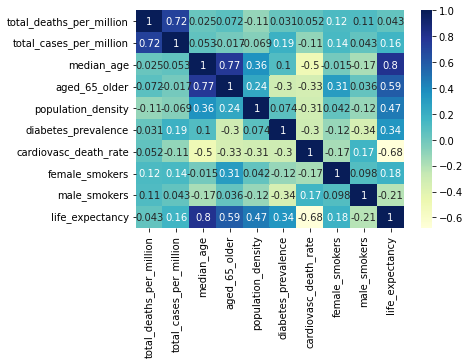

In [ ]:
# creating the correlation matrix
corr = df.corr()
# plotting the heatmap
sns.heatmap(data = corr, cmap='YlGnBu', annot=True)

## **Time Series Chart**

### Time series charts are specifically for temporal data where the feature values represent a state in time

---

A simple line plot when represented using a time series chart gives us an idea about the trend patterns in the values of the feature.

**Problem Statement**

Find out the peaks in daily new COVID cases in Indonesia and what insights can you gather from the chart?

In [ ]:
## change the date column to appropriate format for a time series plot
data['date'] = pd.to_datetime(data['date'])
df = data[data['location']=='Indonesia']

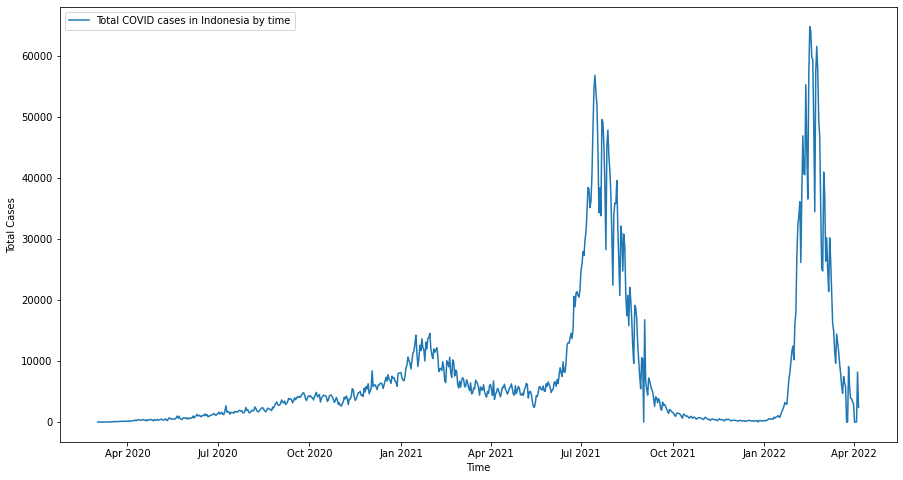

In [ ]:
fig, ax = plt.subplots(figsize=(15, 8))

# Plot 
ax.plot(df.date, df.new_cases, color='tab:blue', label='Total COVID cases in Indonesia by time')

## X and Y axis labels
ax.set_xlabel('Time')
ax.set_ylabel('Total Cases')

# Helpers to format and locate ticks for dates
from matplotlib.dates import DateFormatter, MonthLocator
# format x axis labels to avoid overcrowding the xaxis with all dates
ax.xaxis.set_major_locator(MonthLocator(interval = 3)) ## we show xaxis axis at an interval of 3 months
ax.xaxis.set_major_formatter(DateFormatter('%b %Y')) ## the ticks that show will be in format <Month name> <Year>
## place the legend at upper left corner
ax.legend(loc='upper left');

## **Customizing Plots in python**

---

Customizing plots is essential to convey the right information to the audience. A chart should visually depict a story. 

Best Practices for making your charts more appealing :

*   **Choose the right plot to answer the question**
*   **A good plot should be "LIT"!!! : Legend , Identity/Label & Title**
*   **Clean axis ticks. Avoid overcrowding axis ticks**
*   **Provide precise descriptions of the chart in the title**
*   **Choose colour palettes that are soothing to the eye**


We start with a simple scatter plot between "weekly hospital admissions" & "new cases" and see how we can customize plots in python





In [ ]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.scatter(data['weekly_hosp_admissions'], data['new_cases'])
plt.show()
## The chart below is a bare bon scatter plot which does not give out much information

### **a. Adding axis labels and chart title**

In [ ]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.scatter(data['weekly_hosp_admissions'], data['new_cases'])

#adds a title and axes labels
ax.set_title('Relationship between Weekly Hospital admissions & Daily new cases')
ax.set_xlabel('Weekly Hospital Admissions')
ax.set_ylabel('Daily New Cases')

plt.show()

### **b. Make changes to the grid**

In [ ]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.scatter(data['weekly_hosp_admissions'], data['new_cases'])

#adds a title and axes labels
ax.set_title('Relationship between Weekly Hospital admissions & Daily new cases')
ax.set_xlabel('Weekly Hospital Admissions')
ax.set_ylabel('Daily New Cases')

#remove the box
ax.spines['top'].set_visible(False)                                         ## removes the top border
ax.spines['right'].set_visible(False)                                       ## removes the right border

# add grid lines
ax.grid(color='grey', linestyle='-', linewidth=0.25, alpha=0.5)             ## adds the grid lines of grey colour of 0.5 opacity & 0.25 line width  

plt.show()

### **c. Aesthetics**

* Changing transparency of the plots

In [ ]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.scatter(data['weekly_hosp_admissions'], data['new_cases'] , alpha = 0.40)                  ## alpha controls the transparency of the points for 
                                                                                              ## better visibility of the overlapping points

#adds a title and axes labels
ax.set_title('Relationship between Weekly Hospital admissions & Daily new cases')
ax.set_xlabel('Weekly Hospital Admissions')
ax.set_ylabel('Daily New Cases')

#remove the box
ax.spines['top'].set_visible(False)                                         
ax.spines['right'].set_visible(False)                                       

# add grid lines
ax.grid(color='grey', linestyle='-', linewidth=0.25, alpha=0.5)             

plt.show()

* Changing colour

In [ ]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.scatter(data['weekly_hosp_admissions'], data['new_cases'] , alpha = 0.40 , c = "green")             ## colour parameter changes colour
                                                                                                            ## specify hex codes, colour name or palettes

#adds a title and axes labels
ax.set_title('Relationship between Weekly Hospital admissions & Daily new cases')
ax.set_xlabel('Weekly Hospital Admissions')
ax.set_ylabel('Daily New Cases')

#remove the box
ax.spines['top'].set_visible(False)                                         
ax.spines['right'].set_visible(False)                                       

# add grid lines
ax.grid(color='grey', linestyle='-', linewidth=0.25, alpha=0.5)             

plt.show()

### **d. Creating Subplots**

Subplots are useful when you want to create a compact view of visualizations and show more than 1 graph in a tile format.

In [ ]:
fig, ax = plt.subplots(2)               ## creating 2 subplots in an array

# Accessing each axes object to plot the data through returned array
ax[0].scatter(data['weekly_hosp_admissions'], data['new_cases'])
ax[1].scatter(data['weekly_icu_admissions'], data['new_cases'])

In [ ]:
fig , ax = plt.subplots(2,2)          ## creating 4 subplots in a matrix format

# Accessing each axes object to plot the data through matrix
ax[0,0].scatter(data['weekly_hosp_admissions'], data['new_cases'])
ax[0,1].scatter(data['weekly_icu_admissions'], data['new_cases'])
ax[1,0].scatter(data['people_vaccinated_per_hundred'], data['new_cases'])
ax[1,1].scatter(data['total_deaths_per_million'], data['new_cases'])